In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def VarianceFunction(signal: list, max_lag: int = 10) -> tuple:
    signal = np.array(signal)
    var0 = np.var(signal)
    vf = [1]  # Normalized variance list, starts with 1
    window_sizes = [1]  # Window size for lag=0 is 1 (no averaging)
    for i in range(1, max_lag + 1):
        v = []
        for s in range(i, len(signal) - i):
            # Calculate moving average over window size (2*i + 1)
            v.append(np.sum(signal[s - i:s + i + 1]) / (2 * i + 1))
        
        # Calculate normalized variance and append to list
        normalized_variance = np.var(v) / var0

        vf.append(normalized_variance)
        
        # Append corresponding window size
        window_sizes.append(2 * i + 1)

    return  window_sizes, vf

def RandomWalk(num_steps=1000, sigma=1, a=1):
    x = np.zeros(num_steps)
    for i in range(1, num_steps):
        x[i] = a * x[i-1] + np.random.normal(0, sigma)
    return x

def WhiteNoise(X0=0,num_steps=1000, mu=0, sigma=1,a=1.):
    '''
    X0: Starting Point
    num_steps: Number of steps
    mu: Mean of Gaussian
    sigma: STD of Gaussian
    a: amplification parameter
    '''
    # create result array
    res = np.zeros(num_steps)
    # initialize start value
    res[0] = X0
    # calculate and store time series
    for t in range(1,num_steps):
        res[t] = a*np.random.normal(mu,sigma)

    # return time series
    return res

def AutocorrelationFunction(x, lag=20):
    '''
    x: Input Data
    lag: Time lag
    '''
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1] for i in range(1, lag)])
    
def MovingAverage(timeseries,lag=3):
    '''
        Calculates The Simple Moving Average (SMA) of a timeseries with a certain lag.
        timeseries: The timeseries data to impliment the Simple Moving Average (SMA).
        lag: The lag to use for the Simple Moving Average (SMA).
    '''
    ma = np.empty(len(timeseries))
    ma[:] = np.nan
    for i in range(lag,len(timeseries) - lag):
        ma[i] = np.mean(timeseries[i-lag//2:i+lag//2+1])
    return ma

def sin(t,T=2*np.pi,A=1):
    '''
    A: Amplitude
    T: Period
    t: time-steps
    '''
    return A*np.sin(2*np.pi/T*t)

In [21]:
# Generate Signals
num_steps = 1000
lag = 200
t = np.arange(num_steps)

white_noise = WhiteNoise(num_steps=num_steps)
sin_wave = sin(t, T=100, A=1)
random_walk = RandomWalk(num_steps=num_steps, sigma=1, a=0.8)
random_walk2 = RandomWalk(num_steps=num_steps, sigma=1, a=0.1)
random_walk3 = RandomWalk(num_steps=num_steps, sigma=1, a=0.5)

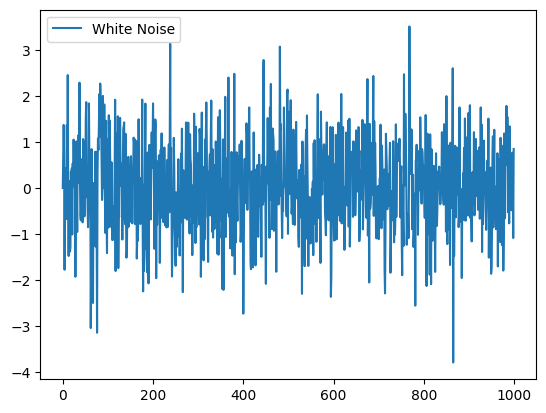

0.030769831131332713
0.9539764091175702


In [23]:
plt.plot(white_noise, label='White Noise')
plt.legend()
plt.show()

print(np.mean(white_noise))
print(np.var(white_noise))

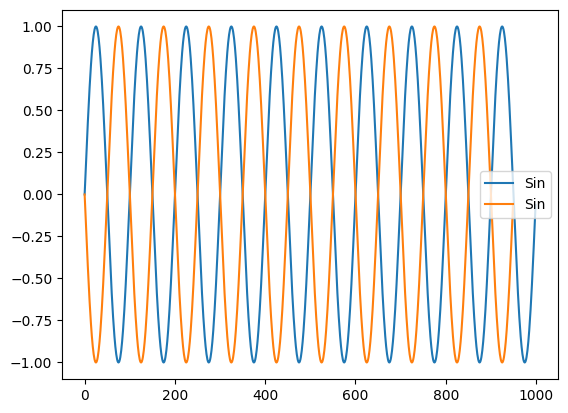

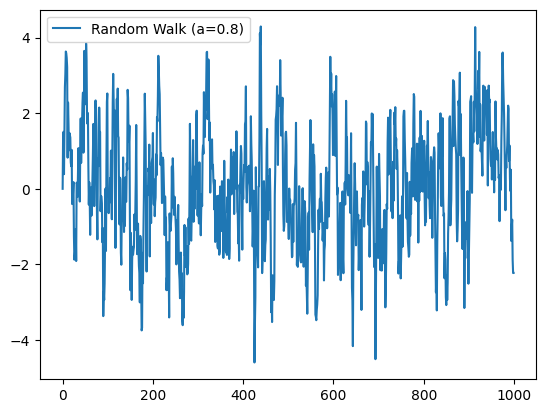

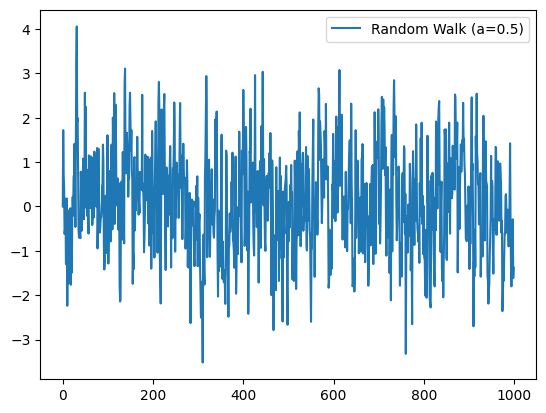

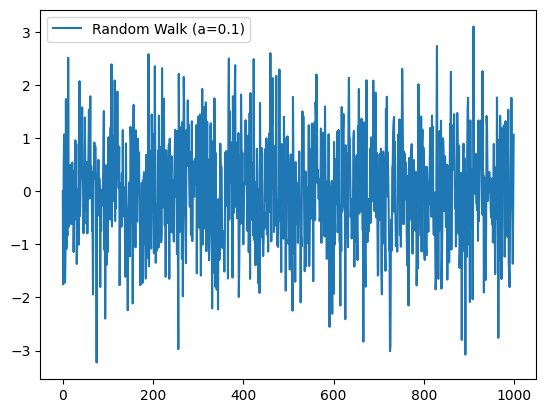

In [31]:
plt.plot(sin_wave, label='Sin')
plt.plot(sin_wave[50:], label='Sin')
plt.legend()
plt.show()

plt.plot(random_walk, label='Random Walk (a=0.8)')
plt.legend()
plt.show()

plt.plot(random_walk3, label='Random Walk (a=0.5)')
plt.legend()
plt.show()

plt.plot(random_walk2, label='Random Walk (a=0.1)')
plt.legend()
plt.show()

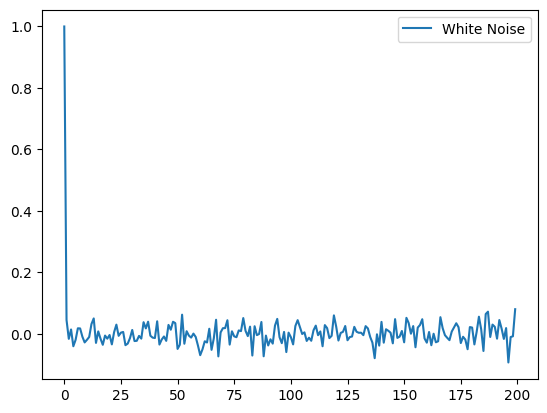

In [24]:
plt.plot(AutocorrelationFunction(white_noise, lag), label='White Noise')
plt.legend()
plt.show()

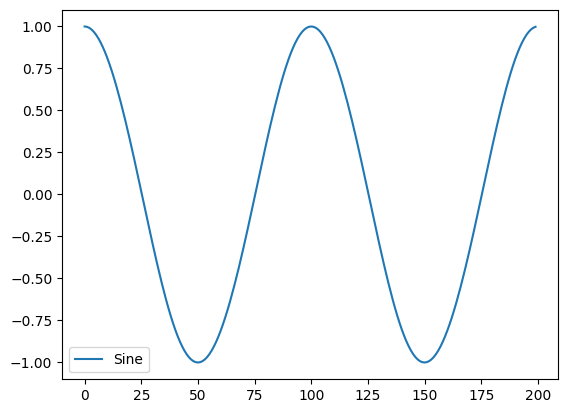

In [25]:
plt.plot(AutocorrelationFunction(sin_wave, lag), label='Sine')
plt.legend()
plt.show()

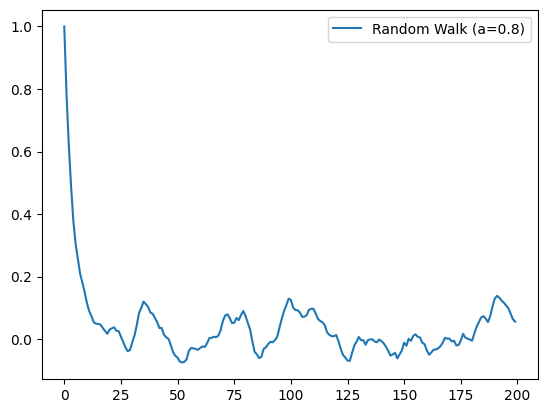

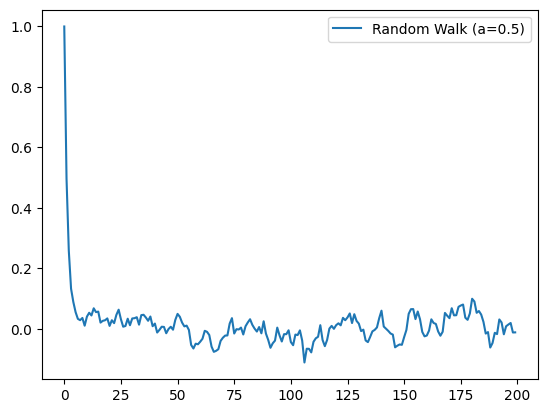

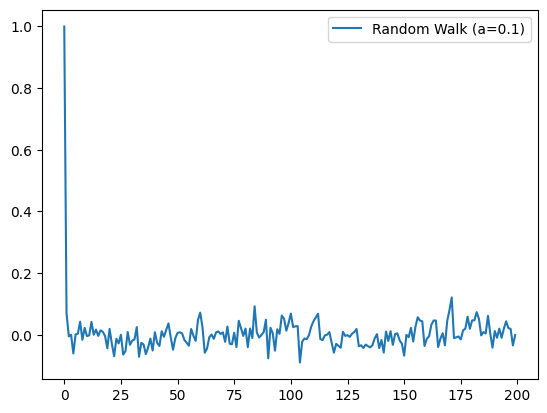

In [33]:
plt.plot(AutocorrelationFunction(random_walk, lag), label='Random Walk (a=0.8)')
plt.legend()
plt.show()

plt.plot(AutocorrelationFunction(random_walk3, lag), label='Random Walk (a=0.5)')
plt.legend()
plt.show()

plt.plot(AutocorrelationFunction(random_walk2, lag), label='Random Walk (a=0.1)')
plt.legend()
plt.show()

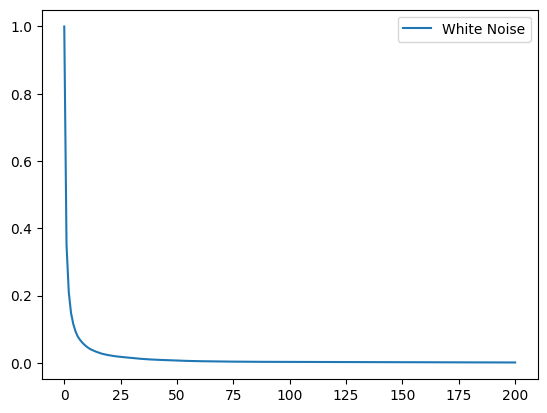

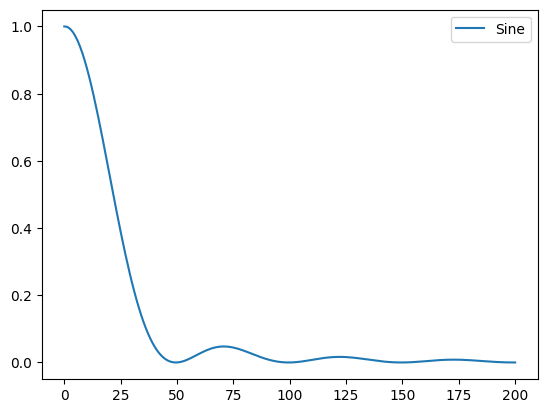

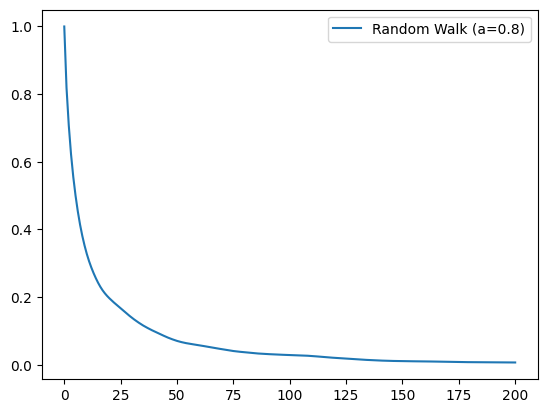

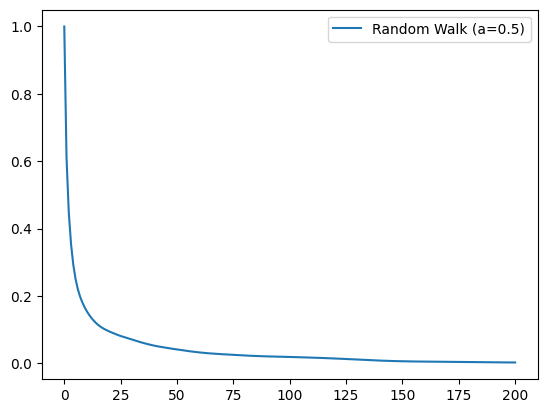

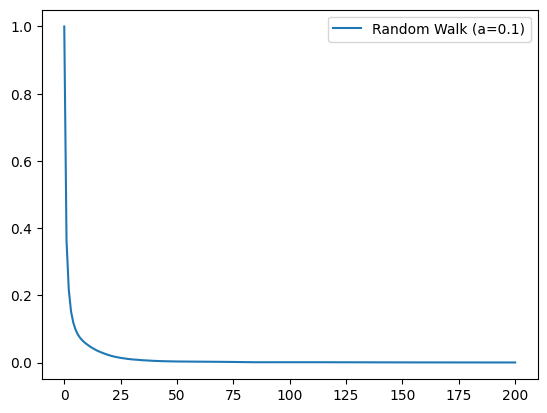

In [32]:
plt.plot(VarianceFunction(white_noise, lag)[1], label='White Noise')
plt.legend()
plt.show()


plt.plot(VarianceFunction(sin_wave, lag)[1], label='Sine')
plt.legend()
plt.show()

plt.plot(VarianceFunction(random_walk, lag)[1], label='Random Walk (a=0.8)')
plt.legend()
plt.show()

plt.plot(VarianceFunction(random_walk3, lag)[1], label='Random Walk (a=0.5)')
plt.legend()
plt.show()

plt.plot(VarianceFunction(random_walk2, lag)[1], label='Random Walk (a=0.1)')
plt.legend()
plt.show()
